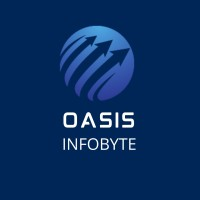

### **Name :** <font color = #5a5a5a>Harshal Prakash Margaj<font/>
### **Task 5 :** <font color = #5a5a5a>SALES PREDICTION USING PYTHON<font/>
### **Description :** <font color = #5a5a5a>Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python. Download dataset from [here](https://www.kaggle.com/datasets/bumba5341/advertisingcsv)<font/>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# **Loading the dataset**

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**<font color = #0E86D4>To see last five rows of the dataset<font/>**

In [ ]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


**<font color = #0E86D4>Delete Unnamed: 0 column<font/>**

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

<font color = #0E86D4>**Let's check to see whether this dataset has any null values:**<font/>

In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**<font color = #0E86D4>To print a concise summary of a DataFrame<font/>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**<font color = #0E86D4>To Generate descriptive statistics of dataset<font/>**

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# **Distribution of the values of the Sales column:**

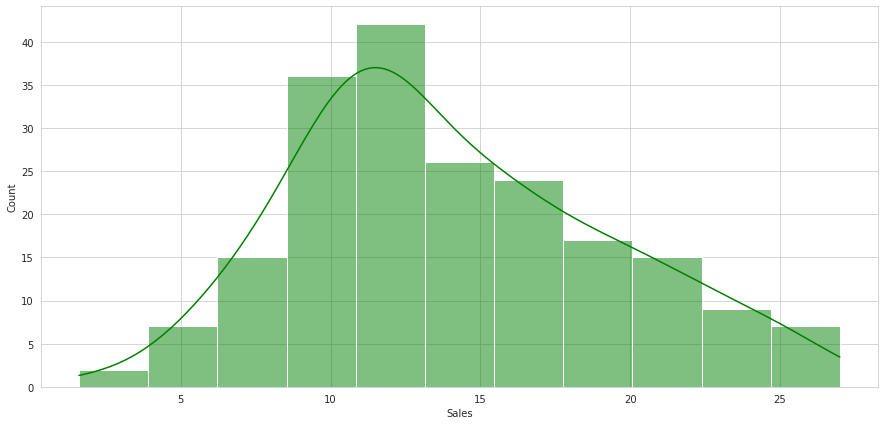

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
sns.histplot(df.Sales, kde = True, color = 'green')
plt.show()

# **Correlation Matrix**

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


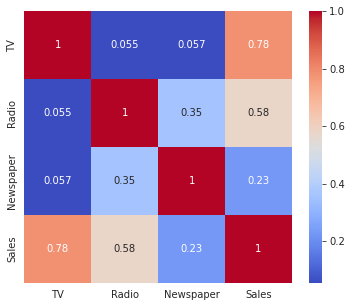

In [ ]:
corr = df.corr()
plt.figure(figsize = (6, 5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

# **Splitting the dataset into training and testing**

In [ ]:
x = np.array(df.drop(['Sales'], axis = 1))
y = np.array(df['Sales'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# **Scaling out data**

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Training a Sales Prediction Model**

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(predictions)

[ 9.5 14.9  9.3  9.7 14.2 11.9  5.6 21.7 25.4 18.5  6.6 13.4  6.6 13.2
 17.1 13.4 15.3 11.6 17.3 11.9 12.2  5.6 14.8 15.3  5.5 15.5 11.5 12.7
 10.4 11.4 11.2 21.7  5.5 18.4 10.1 11.9 15.9 21.8 13.6 17.1]


# **Evaluate the model**

In [ ]:
print(f"Accuracy:  {model.score(x_test, predictions) * 100}")
print(f"R Squared Error: {round(metrics.r2_score(y_test, predictions)*100, 2)}")
print(f'Mean Absolute Error : {metrics.mean_absolute_error(y_test, predictions)}')
print(f'Mean Squared Error : {metrics.mean_squared_error(y_test, predictions)}')
print(f'Root Mean Square Error : {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

Accuracy:  100.0
R Squared Error: 94.68
Mean Absolute Error : 0.9149999999999998
Mean Squared Error : 1.456
Root Mean Square Error : 1.2066482503198686


# **Plotting Actual and Predicted Sales**

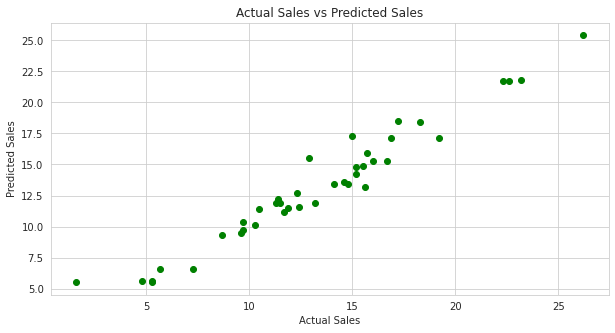

In [ ]:
plt.figure(figsize = (10, 5))
plt.scatter(y_test, predictions, color = 'green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Sales vs Predicted Sales')
plt.show()

# **Prediction - I have tried our model with some example data**

In [ ]:
def prediction(input_data):
  # Input data
  data = df.drop('Sales', axis=1).iloc[input_data]

  # Scaling input data
  # x_train.shape (3, )
  data_scaler = scaler.transform(data.values.reshape(-1, 3))

  # Predict the Input data
  prediction = model.predict(data_scaler)

  # Predicted Sales of Input data
  print(f"Predicted Sales : {prediction[0]}")

  print()

  # Actual Sales of Input data
  actual_sales = df.iloc[input_data].Sales
  print(f"Actual Sales    : {actual_sales}")

prediction(15)

Predicted Sales : 22.4

Actual Sales    : 22.4


**<font color = #5a5a5a>I have used DecisionTreeRegressor Algorithm/Model for prediction and I have tried our model with some example data. So you can see that the Actual Sales are 22.4, but when we tested on our model, our model predicted 22.4, it means our prediction was successful and our model is working properly.<font/>**

# <center>**Thank You!**<center/>